<a href="https://colab.research.google.com/github/graceheng118/main/blob/master/recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Recommendation System**

**Import Dependencies**

In [ ]:
import pandas as pd # for data manipulation (create dataframe)
import numpy as np # for scientific computing (create 3D array)

import sklearn #  for machine learning (data analysis)
# import the class containing the dimensionality reduction method
from sklearn.decomposition import TruncatedSVD # to compute largest singular value
from sklearn.metrics.pairwise import cosine_similarity # to calculate the distance between two vectors

# Make pandas display all the rows instead of truncate
pd.set_option('display.max_rows', None)


In [ ]:
from google.colab import files
uploadFile = files.upload()

Saving ecommerce_furniture1.csv to ecommerce_furniture1.csv
Saving ecommerce_order.csv to ecommerce_order.csv
Saving ecommerce_order_products.csv to ecommerce_order_products.csv
Saving ecommerce_user_views1.csv to ecommerce_user_views1.csv


**Create Dataframe**

In [ ]:
furniture_df = pd.read_csv('ecommerce_furniture1.csv')
views_df = pd.read_csv('ecommerce_user_views1.csv')
itemPurchase_df = pd.read_csv('ecommerce_order_products.csv')
order_df = pd.read_csv('ecommerce_order.csv')

In [ ]:
furniture_df.info()

In [ ]:
furniture_df.head()

,furnitureId,furnitureName,furnitureImg,furnitureGenres,unitPrice,stock,categoryId_id,slug
0,53375496,KASPARAVICIUS,furniture/53375496.jpg,bed|bedroom casegoods|bedroom dressers,327,1,8,furnitureid-53375496
1,54454189,LYNDSIE,furniture/54454189.jpg,bedroom beds and mattresses|bed accessories an...,539,2,8,furnitureid-54454189
2,54455139,KULOISAT,furniture/54455139.jpg,bedroom beds and mattresses|bed accessories an...,535,3,8,furnitureid-54455139
3,11238603,SUNDELL,furniture/11238603.jpg,bedroom beds and mattresses|beds,1125,1,11,furnitureid-11238603
4,11623667,MYRADOW,furniture/11623667.jpg,bedroom beds and mattresses|beds,2228,2,11,furnitureid-11623667


In [ ]:
# drop unnecessary columns
furniture_df = furniture_df.drop(columns=['furnitureImg', 'unitPrice', 'categoryId_id', 'stock', 'slug'])
# get the top 5 items from 'furniture_df'
furniture_df.head()

,furnitureId,furnitureName,furnitureGenres
0,53375496,KASPARAVICIUS,bed|bedroom casegoods|bedroom dressers
1,54454189,LYNDSIE,bedroom beds and mattresses|bed accessories an...
2,54455139,KULOISAT,bedroom beds and mattresses|bed accessories an...
3,11238603,SUNDELL,bedroom beds and mattresses|beds
4,11623667,MYRADOW,bedroom beds and mattresses|beds


In [ ]:
views_df.info()

In [ ]:
views_df.head()

,id,viewCount,furnitureId_id,userId_id
0,1,7,50918687,2
1,2,8,50807783,2
2,3,12,16968018,2
3,4,2,54283665,2
4,5,5,54376747,2


In [ ]:
views_df.rename(columns={'furnitureId_id':'furnitureId', 'userId_id':'userId'}, inplace=True)
views_df = views_df.drop(columns=['id'])
views_df.head()

,viewCount,furnitureId,userId
0,7,50918687,2
1,8,50807783,2
2,12,16968018,2
3,2,54283665,2
4,5,54376747,2


In [ ]:
order_df.info()

In [ ]:
order_df.head()

,orderId,orderDate,isDelivered,isReceived,payment_id,shippingAddress_id,userId
0,1673511,6/17/2021,1,1,1,1,2
1,1199898,6/18/2021,1,1,2,1,2
2,3194192,6/19/2021,1,1,3,1,2
3,1718559,6/20/2021,1,1,4,1,2
4,1447487,6/21/2021,1,1,5,2,3


In [ ]:
order_df = order_df.drop(columns=['isDelivered','isReceived','payment_id','shippingAddress_id'])
order_df.head()

,orderId,orderDate,userId
0,1673511,6/17/2021,2
1,1199898,6/18/2021,2
2,3194192,6/19/2021,2
3,1718559,6/20/2021,2
4,1447487,6/21/2021,3


In [ ]:
itemPurchase_df.info()

In [ ]:
itemPurchase_df.head()

,id,quantity,furnitureId_id,orderId_id
0,1,1,50918687,1673511
1,2,2,50807783,1673511
2,3,1,16968018,1673511
3,4,1,54283665,1673511
4,5,2,54376747,1199898


In [ ]:
itemPurchase_df = itemPurchase_df.drop(columns=['id','quantity'])
itemPurchase_df.rename(columns={'furnitureId_id':'furnitureId', 'orderId_id':'orderId'}, inplace=True)
itemPurchase_df.head()

,furnitureId,orderId
0,50918687,1673511
1,50807783,1673511
2,16968018,1673511
3,54283665,1673511
4,54376747,1199898


**Merge Dataframe**

In [ ]:
merge_df = furniture_df.merge(views_df, on='furnitureId')
merge_df = merge_df.drop(columns=['furnitureGenres'])
merge_df.head()

,furnitureId,furnitureName,viewCount,userId
0,53375496,KASPARAVICIUS,6,2
1,53375496,KASPARAVICIUS,10,3
2,53375496,KASPARAVICIUS,10,4
3,53375496,KASPARAVICIUS,2,5
4,53375496,KASPARAVICIUS,3,6


#**Popularity-based Filtering**

This technique generates recommendations based on the views of the products. The *top 8 furniture with the highest views* will be recommended as ‘Hot Products’ to *customer*, *normal user* and *new user*.


In [ ]:
user_profile_df = views_df
user_profile_df.head()

,viewCount,furnitureId,userId
0,7,50918687,2
1,8,50807783,2
2,12,16968018,2
3,2,54283665,2
4,5,54376747,2


In [ ]:
popular_items = pd.DataFrame(merge_df.groupby('furnitureId')['viewCount'].count())
most_popular_items = popular_items.sort_values(by=['viewCount'], ascending=False)
most_popular_items.head(8)

,viewCount
furnitureId,
77386578,16
53529832,15
54163670,14
53489000,14
53224267,14
52733591,14
77386660,14
52808695,14


#**Collaborative Filtering Recommendation**

This technique a model-based collaborative filtering which recommends products to customer and normal user based on customer’s purchase history and user’s browsing history. 





In [ ]:
cb_merge_df = merge_df
cb_merge_df.head()

,furnitureId,furnitureName,viewCount,userId
0,53375496,KASPARAVICIUS,6,2
1,53375496,KASPARAVICIUS,10,3
2,53375496,KASPARAVICIUS,10,4
3,53375496,KASPARAVICIUS,2,5
4,53375496,KASPARAVICIUS,3,6


Step 1: Create Item-User Matrix using Pivot Table

In [ ]:
# Creating a sparse pivot table with items in rows and users in columns and fill the empty cell with 0
users_items_pivot_matrix_df = cb_merge_df.pivot_table(index='userId', columns='furnitureId', values='viewCount').fillna(0)
users_items_pivot_matrix_df.head(10)

furnitureId,721919,10189701,10442700,10692202,10728561,10814181,10814183,11238603,11253877,11623667,11940409,12430602,13217123,13716336,13769122,14092185,14100765,14137991,14360060,14500158,14500213,14518589,14550115,14579528,14604480,15029411,15040330,15119860,15227124,15227423,15329842,15425531,15425537,15623404,15623408,15672247,15672488,15672491,15672492,15672496,...,77273093,77278892,77282101,77283122,77284059,77285425,77286317,77287413,77287555,77288478,77295340,77335008,77348382,77348431,77353931,77357296,77367910,77370326,77370360,77376999,77381216,77381358,77382050,77386569,77386578,77386654,77386659,77386660,77386661,77387470,77389097,77391200,77393533,77394172,77418280,77418348,77521900,77522688,77568877,77568915
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
10,0.0,0.0,0.0,4.0,0.0,0.0,0.0,9.0,0.0,5.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Transposing the matrix
items_users_pivot_matrix_df = users_items_pivot_matrix_df.T
items_users_pivot_matrix_df.head(10)

userId,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401
furnitureId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
721919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10189701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10442700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10692202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10728561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10814181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10814183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11238603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11253877,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 2: Decompose Item-User Matrix using Truncated SVD


In [ ]:
# Create an instance of 'TruncatedSVD' class 
# n_components=50: the number of desirable components to select 
SVD = TruncatedSVD(n_components=50)

# Fit the data on the instance and then transform the data
decomposed_matrix = SVD.fit_transform(items_users_pivot_matrix_df)
decomposed_matrix.shape

(717, 10)

Step 3: Create Correlation Matrix

In [ ]:
# Compute correlation coefficients and return a matrix of Pearson correlation coefficients
correlation_matrix = np.corrcoef(decomposed_matrix)

In [ ]:
correlation_matrix

array([[ 1.        ,  0.90414923,  0.95794163, ..., -0.11857729,
         0.00503267,  0.90414923],
       [ 0.90414923,  1.        ,  0.79919589, ..., -0.1108188 ,
         0.07357971,  1.        ],
       [ 0.95794163,  0.79919589,  1.        , ..., -0.04450058,
        -0.02128418,  0.79919589],
       ...,
       [-0.11857729, -0.1108188 , -0.04450058, ...,  1.        ,
        -0.14496447, -0.1108188 ],
       [ 0.00503267,  0.07357971, -0.02128418, ..., -0.14496447,
         1.        ,  0.07357971],
       [ 0.90414923,  1.        ,  0.79919589, ..., -0.1108188 ,
         0.07357971,  1.        ]])

Step 4: List Out Items that Purchased or Viewed by the Active User

> Step 4.1 List Out All Items That Purchased By The Active User



In [ ]:
# Get all orders that made by the active user
customer_profile = order_df[order_df['userId'] == 2]
customer_profile = customer_profile.drop(columns='userId')
customer_profile.head()

,orderId,orderDate
0,1673511,6/17/2021
1,1199898,6/18/2021
2,3194192,6/19/2021
3,1718559,6/20/2021


In [ ]:
# convert dataframe to list
oid_list = customer_profile['orderId'].values.tolist()
oid_list

[1673511, 1199898, 3194192, 1718559]

In [ ]:
# Get all items from the order list of target user
all_items_purchased_list = list(Order_Products.objects.values_list('orderId', 'furnitureId'))

# List out all items from each order
items_purchased = []
for oid in oid_list:
    for i in range(len(all_items_purchased_list)):
        if oid == all_items_purchased_list[i][0]:
            items_purchased.append(all_items_purchased_list[i][1])
    

Output:

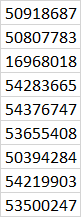


> Step 4.2 List Out All Items That Made By The Active User



In [ ]:
viewer_profile = views_df[views_df['userId'] == 2]
viewer_profile = viewer_profile.drop(columns='userId')
viewer_profile

,viewCount,furnitureId
0,7,50918687
1,8,50807783
2,12,16968018
3,2,54283665
4,5,54376747
5,6,53655408
6,7,50394284
7,8,54219903
8,9,53500247
9,6,53375496


In [ ]:
# convert dataframe to list
itemViewed = viewer_profile['furnitureId'].values.tolist()
itemViewed

[50918687,
 50807783,
 16968018,
 54283665,
 54376747,
 53655408,
 50394284,
 54219903,
 53500247,
 53375496,
 54454189,
 54455139,
 50493022]

In [ ]:
  # Isolating items purchased by the active user from Correlation Matrix
  for i in itemViewed:
      for j in range(len(items_users_pivot_matrix_df)):
          if(items_users_pivot_matrix_df.index[j] == i):
              # print(items_users_pivot_matrix_df.index[j])
              fid_list = list(items_users_pivot_matrix_df.index) # change everything into list form
              
              # find the index(location) of the target item
              item = fid_list.index(i)
              
              # get correlation coefficients value of the item
              correlation = correlation_matrix[item]
              
              # list out items that the pearson correlation value > 0.9 
              # 0.9 suggests a strong, positive association between two variables 
              recommend_list = list(items_users_pivot_matrix_df.index[correlation > 0.90])
              
              # remove the items already bought by the active user
              recommend_list.remove(i) 

              # sort items with the highest pearson correlation value
              recommend_list.sort(reverse=True)

              # get the first 12 items
              recommend_list = recommend_list[:12]

Step 5: Make Recommendations

In [ ]:
recommend_list

[77367910,
 77283122,
 54660183,
 54615054,
 54440054,
 54376747,
 54283665,
 53655408,
 53290703,
 53290576,
 50980467,
 50918687]

#**Content-based Filtering** 
This technique recommends items to customers based on the purchase history. It generates item-item recommendations by using *cosines similarity* to measure the similarity between two products based on user and product genres.

Step 1: Data Cleaning and Exploration

In [ ]:
cb_furniture_df = furniture_df
# convert the genres that separated with pipes into a list using the "split" function
cb_furniture_df['furnitureGenres'] = cb_furniture_df.furnitureGenres.str.split('|')
cb_furniture_df.head()

,furnitureId,furnitureName,furnitureImg,furnitureGenres,unitPrice,stock,categoryId_id,slug
0,53375496,KASPARAVICIUS,furniture/53375496.jpg,"[bed, bedroom casegoods, bedroom dressers]",327,1,8,furnitureid-53375496
1,54454189,LYNDSIE,furniture/54454189.jpg,"[bedroom beds and mattresses, bed accessories ...",539,2,8,furnitureid-54454189
2,54455139,KULOISAT,furniture/54455139.jpg,"[bedroom beds and mattresses, bed accessories ...",535,3,8,furnitureid-54455139
3,11238603,SUNDELL,furniture/11238603.jpg,"[bedroom beds and mattresses, beds]",1125,1,11,furnitureid-11238603
4,11623667,MYRADOW,furniture/11623667.jpg,"[bedroom beds and mattresses, beds]",2228,2,11,furnitureid-11623667


In [ ]:
from collections import Counter
# Use Counter to create a dictionary containing frequency counts of each genre
genres_counts = Counter(g for genres in furniture_df['furnitureGenres'] for g in genres)
genres_counts

Counter({'accent chairs': 114,
         'accent stools': 2,
         'accent table sets': 53,
         'accent tables': 239,
         'bakers racks': 1,
         'bar serving carts': 5,
         'bath furniture cabinets': 14,
         'bathroom storage cabinets': 10,
         'bean bag seats': 6,
         'bed': 1,
         'bed accessories and parts': 2,
         'bedroom armoires': 12,
         'bedroom beds and mattresses': 264,
         'bedroom casegoods': 1,
         'bedroom casegoods and accent armoires': 12,
         'bedroom casegoods and accent dressers': 171,
         'bedroom casegoods and accent nightstands': 109,
         'bedroom casegoods and accent privacy screens': 16,
         'bedroom casegoods and accent vanity tables': 4,
         'bedroom dressers': 174,
         'bedroom furniture sets': 73,
         'bedroom nightstands': 109,
         'bedroom sets': 73,
         'beds': 179,
         'benches': 75,
         'buffet': 1,
         'buffets and  servers and  ca

Step 2: Transforming Data

In [ ]:
# Iterating through furniture_df, append 1 if that furniture's genres contain that genre, while "0" does not
genres = list(genres_counts.keys())
for g in genres:
    furniture_df[g] = furniture_df['furnitureGenres'].transform(lambda x: int(g in x))

furniture_df[genres].head(10)

,bed,bedroom casegoods,bedroom dressers,bedroom beds and mattresses,bed accessories and parts,beds,headboards,loft and bunk beds,mattresses,bedroom casegoods and accent armoires,bedroom armoires,bedroom casegoods and accent dressers,bedroom casegoods and accent nightstands,bedroom nightstands,bedroom casegoods and accent privacy screens,privacy screens,bedroom casegoods and accent vanity tables,vanity tables,bedroom furniture sets,bedroom sets,cabinets and shelving and storage,bath furniture cabinets,bathroom storage cabinets,over the toilet etageres,decorative accent decorative storage cabinets,food-entertaining- storage and organization,buffets and servers and carts and bakers racks,buffet,decorative accent decorative storage drawers,decorative accent trunks,shelving and bookcases,decorative bookshelf,decorative wall shelf,modular shelf frame,tv and media storage,media storage cabinets,tv entertainment centers,tv stands and consoles,decorative accent mirrors,decorative wall mirrors,...,bakers racks,bar serving carts,dining hutches,freestanding bars,kitchen carts and islands,pantry storage cabinets,sideboard buffet servers,wine and bar cabinets,wine racks,office cabinets,office desks,office tables,office furniture sets,office hutch tops,seating and tables,indoor seating,accent chairs,accent stools,bean bag seats,sofas,benches,chaise lounges,counter and bar stools,dining chairs,gaming chairs,ottomans,task and office chairs,seating sets,standalone tables,accent tables,drawers,coffee tables,console tables,dining tables,folding tables,table sets,accent table sets,dining table sets,storage chests and cabinets + bookcases,storage decorative storage cabinets
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Step 3: Retrieve Items From The Latest Order Made By The Active User


In [ ]:
orders = order_df[order_df['userId'] == 2]
latest_order = orders.tail(1)
latest_order

,orderId,orderDate,userId
3,1718559,6/20/2021,2


In [ ]:
# List out the items from the order
order_items = itemPurchase_df[itemPurchase_df['orderId'] == 1718559]
# order_items = itemPurchase_df.drop(columns=['userId', 'orderDate', 'orderId'])
order_items = order_items['furnitureId'].values.tolist()
order_items

[54219903, 53500247]

Step 4: Make Recommendations Using Cosine Similarity



*   measures the similarity between two vectors by calculating the cosine angle between the two vectors (e.g., A and B
*   The smaller the cosine angle, the higher the degree of similarity between A and B

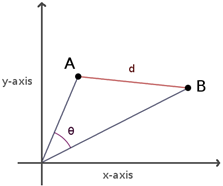






In [ ]:
# Build item-item recommendation using cosine similarity
cosine_sim = cosine_similarity(furniture_df[genres], furniture_df[genres])
cosine_sim

In [ ]:
# create index mapper which maps furniture ID to the index that it represents in the furniture matrix
furniture_idx = dict(zip(cb_furniture_df['furnitureId'], list(cb_furniture_df.index)))
furniture_idx

{53375496: 0,
 54454189: 1,
 54455139: 2,
 11238603: 3,
 11623667: 4,
 14574892: 5,
 14574897: 6,
 14579496: 7,
 14579528: 8,
 14580866: 9,
 15204281: 10,
 15227124: 11,
 15227423: 12,
 15229881: 13,
 16262787: 14,
 16265803: 15,
 16534287: 16,
 16534296: 17,
 17035685: 18,
 17035698: 19,
 17230171: 20,
 17230598: 21,
 17405077: 22,
 50018605: 23,
 50236222: 24,
 50238393: 25,
 50239724: 26,
 50252649: 27,
 50252657: 28,
 50252673: 29,
 50252675: 30,
 50252678: 31,
 50305554: 32,
 50502611: 33,
 50820537: 34,
 50820644: 35,
 50820685: 36,
 52174380: 37,
 52174460: 38,
 52174506: 39,
 52174509: 40,
 52179737: 41,
 52665415: 42,
 53143456: 43,
 53294805: 44,
 53294850: 45,
 53295250: 46,
 53295275: 47,
 53295279: 48,
 53295308: 49,
 53295350: 50,
 53295357: 51,
 53295410: 52,
 53295421: 53,
 53295441: 54,
 53295500: 55,
 53295507: 56,
 53295514: 57,
 53295568: 58,
 53295600: 59,
 53295605: 60,
 53295624: 61,
 53295668: 62,
 53297454: 63,
 53297472: 64,
 53297513: 65,
 53297522: 66,
 5329

In [ ]:
# remove the items that the active user viewed or purchased in the recommendation list
def removeViewedItem(uid,similar_items):
  cb_viewer_profile_df = viewer_profile    

  for i in cb_viewer_profile_df:
      for j in similar_items:
          if i == j:
              similar_items.remove(j)
  
  return similar_items

In [ ]:
# recommend the top 12 most similar item to each order item
recommend_list = []

for i in order_items:
    # find the location of the target item
    fid = furniture_idx[i]
    
    # Add counter to the list e.g. [(0, 'a'), (1, 'b'), (2, 'c')]
    sim_scores = list(enumerate(cosine_sim[fid]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get top 100 most similar items to target item.
    sim_scores = sim_scores[:100]
    # Get the row index
    similar_furniture = [i[0] for i in sim_scores]

    # remove items that viewed before in the list
    items = list(furniture_df['furnitureId'].iloc[similar_furniture])
    recommend_furniture = removeViewedItem(2,items)

    # recommend_list.append(list(furniture_df['furnitureId'].iloc[similar_furniture]))
    recommend_list.append(recommend_furniture[:12])


In [ ]:
recommend_list

[[17039067,
  17061029,
  49167007,
  51237607,
  51239046,
  51239304,
  53441808,
  53443296,
  53443548,
  53639309,
  54198228,
  54205696],
 [10422900,
  10728190,
  11358386,
  15119860,
  15411782,
  15566879,
  15623402,
  15623403,
  15623404,
  15672488,
  16645770,
  16645771]]